In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.decomposition import PCA
import heapq
import scipy

file="/home/shaoguang/anaconda3/shaoguang123/bishe_csg/hq2.csv"
hs300b=pd.read_csv("/home/shaoguang/anaconda3/shaoguang123/bishe_csg/hs300b.csv",encoding="utf-8")
hq=pd.read_csv(file,encoding="utf-8")

In [2]:
%matplotlib inline

In [5]:
hq1=hq.iloc[:,[0,1,2,4,5]]
hq1

,指数代码,指数名称,发布日期,成交量(亿股),涨跌幅(%)
0,801010,农林牧渔,2017/4/25 0:00,6.37,0.17
1,801010,农林牧渔,2017/4/24 0:00,6.93,-2.03
2,801010,农林牧渔,2017/4/21 0:00,6.03,-0.32
3,801010,农林牧渔,2017/4/20 0:00,7.69,-0.13
4,801010,农林牧渔,2017/4/19 0:00,8.79,-1.58
5,801010,农林牧渔,2017/4/18 0:00,7.69,-1.18
6,801010,农林牧渔,2017/4/17 0:00,8.22,-1.23
7,801010,农林牧渔,2017/4/14 0:00,10.39,-0.98
8,801010,农林牧渔,2017/4/13 0:00,10.73,0.21
9,801010,农林牧渔,2017/4/12 0:00,10.37,-0.64


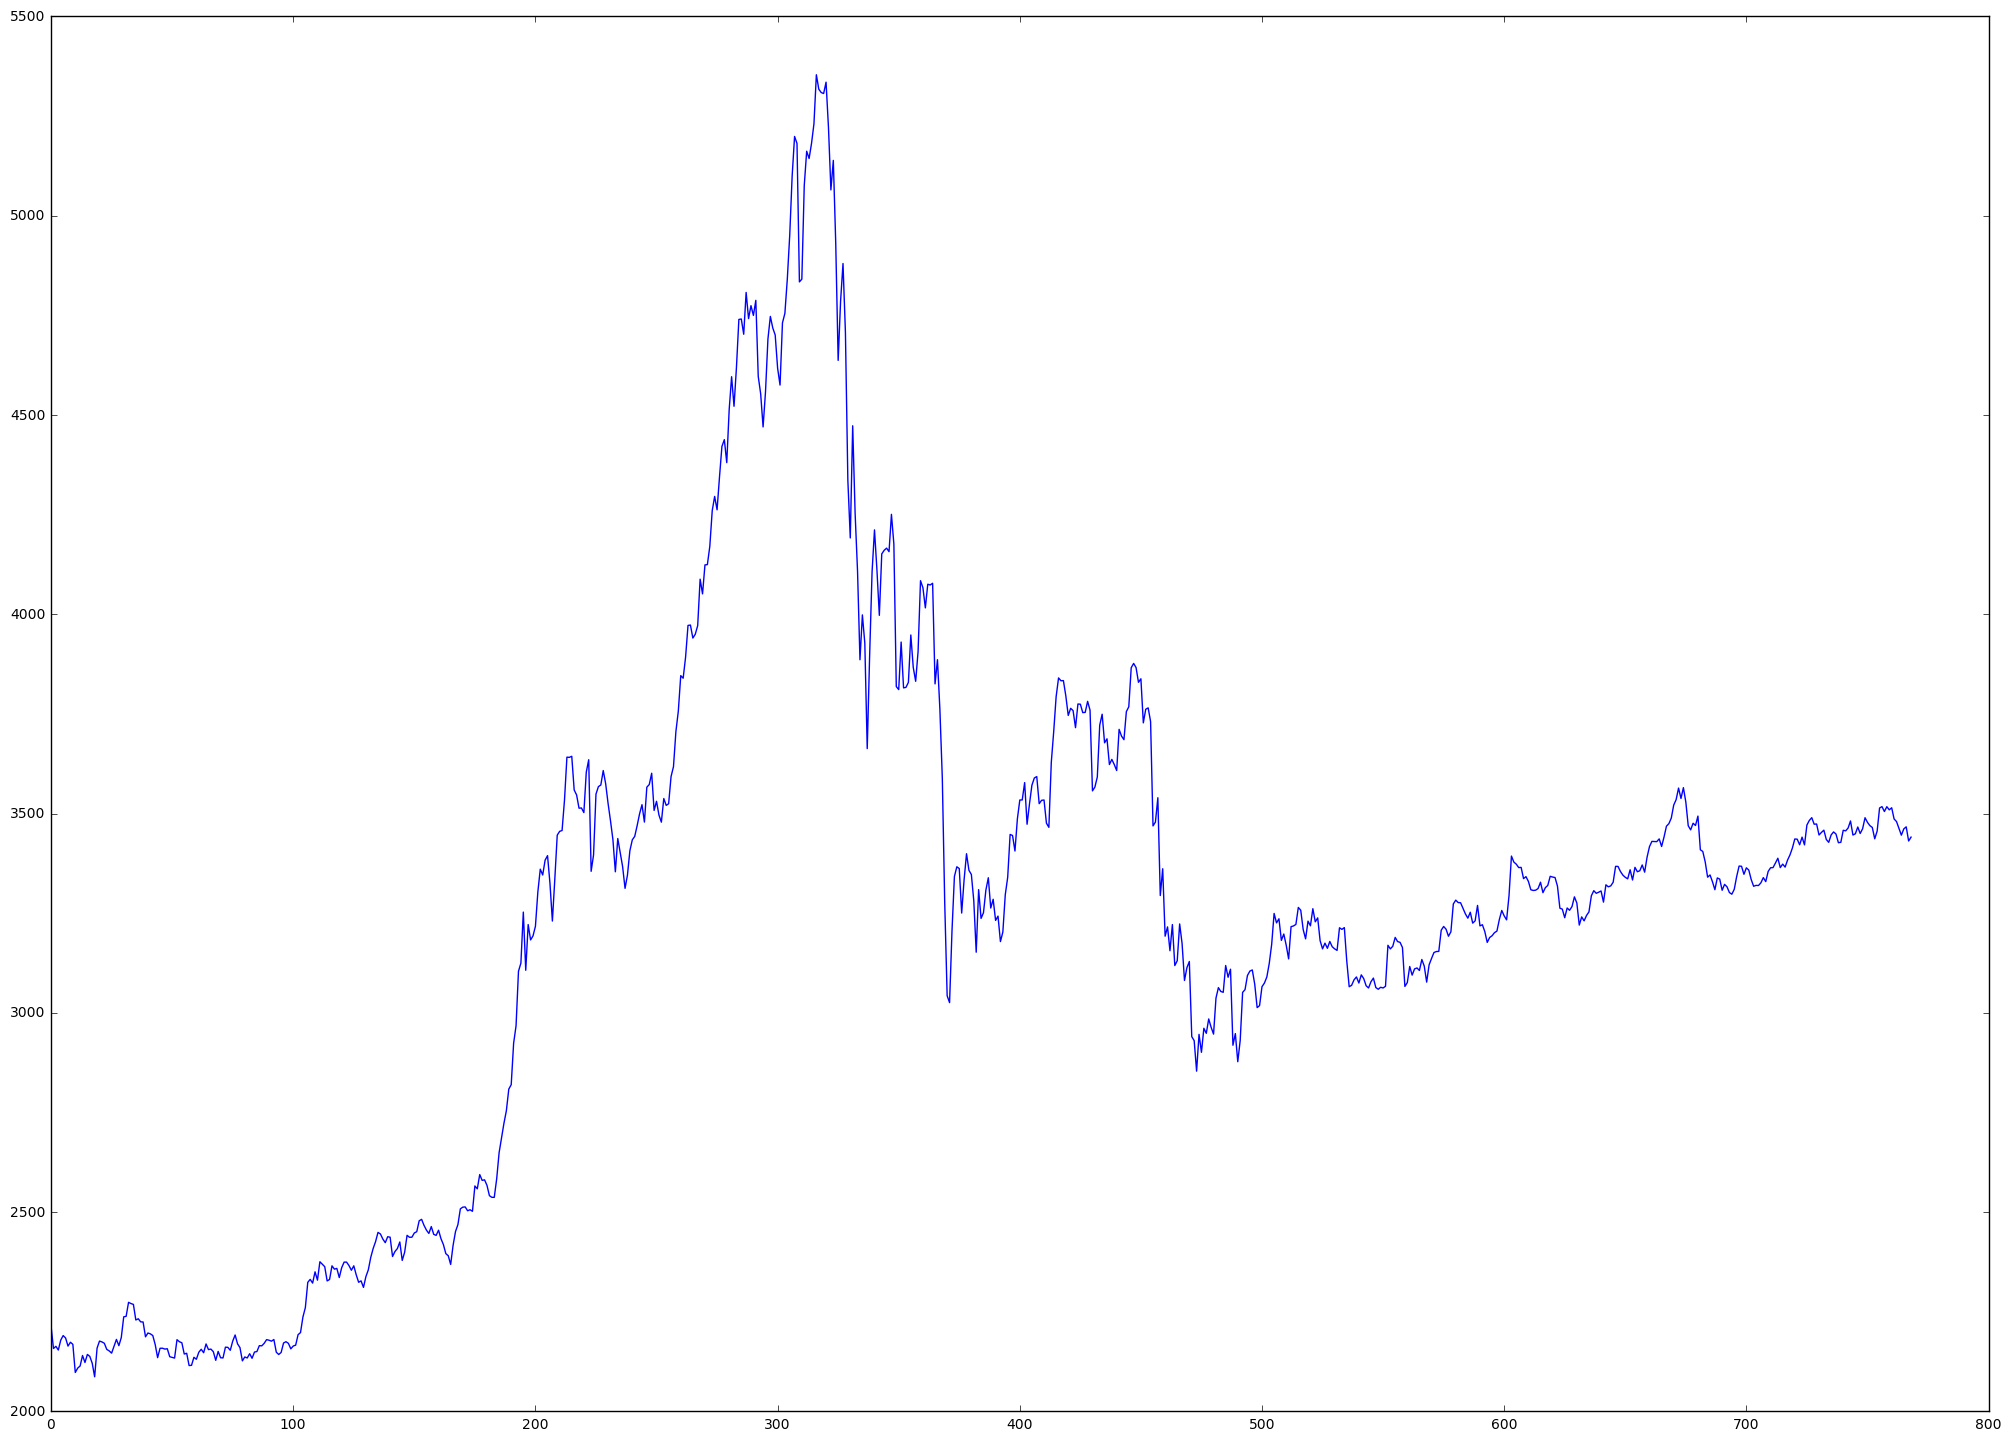

In [6]:
#沪深300走势
close=hs300b.iloc[:,4]
plt.figure(figsize=(25,18))
plt.plot(close)

In [7]:
col=int(hq1.iloc[:,0:1].size)
dat=int(col/28)
val=np.zeros((dat,28))
row_list=np.zeros(28)
Column_list=np.arange(0,dat,1)
for i in range(28):
    row_list[i]=hq1.iloc[i*dat,0]
for i in range(dat):
    for j in range(28):
        val[dat-i-1][j]=hq1.iloc[i+dat*j,4]

In [8]:
#求得每日各行业板块涨幅
data=pd.DataFrame(val,index=Column_list,columns=row_list)
data

,801010.0,801020.0,801030.0,801040.0,801050.0,801080.0,801110.0,801120.0,801130.0,801140.0,...,801720.0,801730.0,801740.0,801750.0,801760.0,801770.0,801780.0,801790.0,801880.0,801890.0
0,-0.66,-2.58,-0.70,-0.67,-1.66,2.07,-3.69,-1.35,0.08,0.40,...,-2.84,0.49,-1.21,1.37,1.69,0.33,-2.68,-1.49,-1.35,-0.51
1,-4.60,-2.66,-3.63,-1.90,-3.03,-5.78,-3.44,-2.93,-3.85,-3.75,...,-2.60,-4.48,-5.48,-3.85,-3.82,-4.63,-1.21,-2.85,-3.86,-4.15
2,0.16,0.91,1.06,0.75,3.36,-0.16,0.14,-0.32,0.84,0.43,...,-0.11,1.57,-0.54,0.15,-2.01,-0.56,0.35,-0.31,1.98,0.11
3,-1.10,-0.97,-0.39,0.66,-1.86,-2.28,-2.65,-0.98,-1.63,-0.88,...,-1.28,0.00,0.61,-1.11,-3.68,-1.92,1.44,0.17,-0.74,-1.35
4,0.63,-0.04,0.55,0.17,1.61,1.40,2.47,2.68,0.95,0.42,...,1.35,1.83,1.35,1.13,0.85,1.57,-0.59,2.77,2.23,1.49
5,2.14,0.44,2.09,0.44,1.39,1.96,1.61,1.71,2.61,1.52,...,1.77,2.14,2.52,2.62,1.86,2.48,-0.72,-0.90,2.01,2.13
6,-0.44,-0.24,0.03,-0.50,0.46,-0.25,-1.05,-1.09,0.07,0.32,...,-0.52,-0.35,0.84,-1.11,-0.66,0.39,0.66,0.01,-0.34,-0.26
7,0.00,0.25,-0.69,-0.08,-1.11,-0.01,-1.22,0.98,1.05,-0.37,...,-0.25,-0.70,-1.40,-0.06,-0.43,-0.24,-1.45,-1.07,-0.80,-0.31
8,-0.46,-0.67,0.35,0.50,-0.54,-0.26,0.86,-0.26,0.11,0.13,...,0.59,-0.20,-1.41,-0.81,0.69,1.06,0.99,0.84,-0.82,-0.10
9,-0.78,0.02,0.21,0.06,0.40,-0.59,-0.32,0.86,-1.06,-0.37,...,-0.74,0.44,-0.08,-1.06,-0.30,-1.24,-0.32,-1.03,0.50,-0.51


In [9]:
#求取每日涨幅排行前5的行业
order1=[]
order2=[]
order3=[]
order4=[]
order5=[]
for i in range(dat):
    Sector_list=[]
    for j in range(28):
        Sector_list.append((row_list[j],val[i][j]))
    top = heapq.nlargest(5,Sector_list,key=lambda s: s[1])
    order1.append(top[0][0]),order2.append(top[1][0]),order3.append(top[2][0]),order4.append(top[3][0]),order5.append(top[4][0])
order_list=pd.DataFrame()
order_list.insert(0,"order1",order1),order_list.insert(1,"order2",order2),order_list.insert(2,"order3",order3),order_list.insert(3,"order4",order4),order_list.insert(4,"order5",order5)
order_list

,order1,order2,order3,order4,order5
0,801080.0,801760.0,801210.0,801750.0,801150.0
1,801780.0,801180.0,801040.0,801170.0,801210.0
2,801050.0,801880.0,801230.0,801730.0,801030.0
3,801780.0,801040.0,801160.0,801740.0,801790.0
4,801790.0,801120.0,801110.0,801230.0,801880.0
5,801160.0,801750.0,801130.0,801740.0,801770.0
6,801180.0,801230.0,801740.0,801780.0,801050.0
7,801130.0,801210.0,801120.0,801200.0,801020.0
8,801180.0,801770.0,801780.0,801710.0,801110.0
9,801150.0,801120.0,801880.0,801730.0,801050.0


In [10]:
#PCA降维
pca=PCA(n_components=10,copy=False)
A=pca.fit_transform(data)

In [11]:
#行业轮动匹配所需函数
def isIn(a,b,data2):
    top_3=[]
    for i in range(3):
        top_3.append(data2.iloc[b,i])
    if data2.iloc[a,0] in top_3:
        return True
    else:
        return False

In [14]:
n=3 #隐状态数目
T=350 #样本窗口大小
t=1 #预测天数
w_n=5 #与当前交易日相同市场隐含状态相同行业轮动特征且似然值最接近的天数
index = 0 
step = t
win=0
lose=0
win0=0
win1=0
win2=0
win3=0
win4=0
win5=0
win6=0

In [17]:
while index+T < len(A)-step:
    model = hmm.GaussianHMM(n_components= n, covariance_type="spherical", n_iter=1000).fit(A[index:index+T])
    hist_info = [] 
    hiddenStatus = model.predict(A[index:index+T])
    
    #print (hiddenStatus)
    for i in range(index, index+T):
        #hiddenStatu = model.predict(A[index+i : index+i+1])
        score = model.score(A[i: i+1])
        day_tuple = (i, hiddenStatus[i-index], score)
        hist_info.append(day_tuple) 
        
    #print (hist_info)
    last_hiddenStatus = hist_info[-1][1]
    last_score = hist_info[-1][2]
    last_index = hist_info[-1][0]
    print(last_index)
    
    sameStatus = []
    cnt=0
    for (x,y,z) in hist_info[:-1]:
        if y == last_hiddenStatus:#市场隐含状态匹配
            if  isIn(last_index,x,order_list) and isIn(last_index-1,x-1,order_list):#行业轮动特征匹配
                diff = abs(z - last_score)
                sameStatus.append((x, diff))
                cnt+=1
    if(cnt<w_n): 
        index += step
        continue
    pos_diffs = heapq.nsmallest(w_n, sameStatus, key=lambda s: s[1])
        
    #加权预测
    weights = [5,4,3,2,1]
    d={}
    for i in range(w_n):
        if order_list.iloc[pos_diffs[i][0]+1,0] in d:
            d[order_list.iloc[pos_diffs[i][0]+1,0]]+=weights[i]/2
        else:
            d[order_list.iloc[pos_diffs[i][0]+1,0]]=weights[i]/2
                
    for i in range(w_n):
        for j in range(1,3):
            if order_list.iloc[pos_diffs[i][0]+1,j] in d:
                d[order_list.iloc[pos_diffs[i][0]+1,j]]+=weights[i]*(3-j)/6
    d=sorted(d.items(),key = lambda asd:asd[1],reverse=True)
    print("&&&&&&&&&&&&&&&&&&&&&&&&&&")
    print(d)
            
    
    top_5=[]
    for i in range(5):
        top_5.append(order_list.iloc[last_index+1,i])

    print(last_index)
    print(top_5)

    if d[0][0] in top_5 or d[1][0] in top_5 or (len(d)<3 or d[2][0] in top_5):
        win+=1
        print("win")
        if d[0][0] in top_5:
            win0+=1
        
        if len(d)<2:
            if d[0][0] in top_5:
                win1+=1
        elif d[1][0] in top_5:
            win1+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win2+=1
        elif len(d)<3:
            if d[0][0] in top_5 or d[1][0] in top_5:
                win2+=1
        elif d[2][0] in top_5:
            win2+=1
        
        if len(d)<2:
            if d[0][0] in top_5:
                win3+=1
        elif d[0][0] in top_5 and d[1][0] in top_5:
            win3+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win4+=1
        elif d[0][0] in top_5 or d[1][0] in top_5:
            win4+=1
         
        if len(d)<2:
            if d[0][0] in top_5:
                win5+=1
        elif len(d)<3:
            if d[0][0] in top_5 and d[1][0] in top_5:
                win5+=1
        elif d[0][0] in top_5 and d[1][0] in top_5 and d[2][0] in top_5:
            win5+=1
            
        if len(d)<2:
            if d[0][0] in top_5:
                win6+=1
        elif len(d)<3:
            if d[0][0] in top_5 or d[1][0] in top_5:
                win6+=1
        elif d[0][0] in top_5 or d[1][0] in top_5 or d[2][0] in top_5:
            win6+=1
    else:
        lose+=1
    index += step

print(win)
print(lose)
print(win/(win+lose))
print(win0/(win+lose))
print(win1/(win+lose))
print(win2/(win+lose))
print(win3/(win+lose))
print(win4/(win+lose))
print(win5/(win+lose))
print(win6/(win+lose))
print("Done")

351
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801740.0, 4.5), (801120.0, 1.5), (801160.0, 1.0), (801720.0, 0.5)]
351
[801740.0, 801210.0, 801040.0, 801780.0, 801130.0]
win
352
353
354
355
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801740.0, 5.0), (801120.0, 2.0), (801160.0, 0.5)]
355
[801710.0, 801740.0, 801720.0, 801890.0, 801140.0]
win
356
357
358
359
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801740.0, 4.5), (801200.0, 2.0), (801170.0, 1.0)]
359
[801200.0, 801210.0, 801130.0, 801050.0, 801020.0]
win
360
361
362
363
364
365
366
367
368
369
370
371
372
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801120.0, 3.166666666666667), (801780.0, 2.5), (801050.0, 1.5), (801750.0, 1.5), (801180.0, 1.0)]
372
[801740.0, 801720.0, 801770.0, 801890.0, 801200.0]
373
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801740.0, 6.0), (801120.0, 1.0), (801160.0, 0.5)]
373
[801780.0, 801740.0, 801720.0, 801040.0, 801170.0]
win
374
375
&&&&&&&&&&&&&&&&&&&&&&&&&&
[(801230.0, 2.5), (801080.0, 2.3333333333333335), (801740.0, 1.5), (801110.0, 1.1666666666666665), (801790.0, 1.0)]
375
[8